# Read Me

Plotting all clear cases and their trajectories for paper v2

# Imports

In [3]:
#from traj_check import trajcheck
#from traj_plot import traj_plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import pandas as pd
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
from netCDF4 import date2index
from scipy import interpolate 
from netcdftime import utime
from datetime import datetime
import metpy.calc as mcalc
from metpy.units import units
from meteo import spec_humidity
from siphon.simplewebservice.igra2 import IGRAUpperAir
###################################
# importing my custom modules #
## Required for reading IGRA and SHEBA data
from station_plot import plot_station
from sounding_finder import sounding_finder
from sheba_df import sheba_df # To load sounding data at sheba
from sounding_df import sounding_df as sd


%matplotlib inline
# path to all trajectory files
path_traj= '/home/ollie/muali/Data/winter_all/'

In [4]:
## Cloud data
filename3_ = '/home/ollie/muali/Data/Cloud_data2/shbclouds.19971020.19981001.cdf'
ds_cloud2 = xr.open_dataset(filename3_)
# conversion from JDD to date-time
cdftime = utime('days since 1997-01-01 00:00:00')
t_file = cdftime.num2date(ds_cloud2.dtime) # for converting into time
# updating time
ds_cloud2.dtime.values = t_file # has 10 min time intervals

ds_cloud2['time'] = ds_cloud2.dtime

# filter bad values
ds_cloud2.lb_b.values[ds_cloud2.lb_b.values == -999] = np.nan
ds_cloud2.ht_e.values[ds_cloud2.ht_e.values == -999] =np.nan

# Reading cases

## 30.12.1997 23 UTC

In [5]:
# sheba df 30th Dec 23:00
df_she_30_23 = sheba_df('/home/ollie/muali/data_work/Sounding_data/unzipped_data/1997_12_ascii/yc302315.she', dropnan=True)
she_30_23= sd(df_she_30_23)
q_she_30_23 = she_30_23.spec_humidity()
rh_she_30_23 = she_30_23.relative_humidity()

#  RSM00030054
rsm3054_coords=[59.45, 112.58]

df_rsm3054_25_12 = sounding_finder(file='RSM00030054', from_line='#RSM00030054 1997 12 25',\
                           to_line='#RSM00030054 1997 12 26', to_df=1)

rsm3054_25_12 = sd(df_rsm3054_25_12)
q_rsm3054_25_12 = rsm3054_25_12.spec_humidity()
rh_rsm3054_25_12 = rsm3054_25_12.relative_humidity()

df_rsm3054_26_12 = sounding_finder(file='RSM00030054', from_line='#RSM00030054 1997 12 26',\
                           to_line='#RSM00030054 1997 12 27', to_df=1)

rsm3054_26_12 = sd(df_rsm3054_26_12)
q_rsm3054_26_12 = rsm3054_26_12.spec_humidity()
rh_rsm3054_26_12 = rsm3054_26_12.relative_humidity()

# interpolating data
# Only reading at 12:00, hence, interpolated using 25th and 26th 12 UTC reading


f_rsm3054_26_12 = interpolate.interp1d(x=rsm3054_26_12.p, y=rsm3054_26_12.T)

f_rsm3054_25_12 = interpolate.interp1d(x=rsm3054_25_12.p, y=rsm3054_25_12.T)

f_q_rsm3054_26_12 = interpolate.interp1d(x=rsm3054_26_12.p, y=rsm3054_26_12.q)

f_q_rsm3054_25_12 = interpolate.interp1d(x=rsm3054_25_12.p, y=rsm3054_25_12.q)

x_p = np.arange(400, 1000, 50)

T_rsm3054_interpolated = np.mean([f_rsm3054_25_12(x_p),  f_rsm3054_26_12(x_p)], axis=0 )

q_rsm3054_interpolated = np.mean([f_q_rsm3054_25_12(x_p),  f_q_rsm3054_26_12(x_p)], axis=0 )


# RSM00024343
rsm24343_coords=[66.76, 123.4]

df_rsm24343_27 = sounding_finder(file='RSM00024343', from_line='#RSM00024343 1997 12 27',\
                           to_line='#RSM00024343 1997 12 28', to_df=1)

rsm24343_27 = sd(df_rsm24343_27)
q_rsm24343_27 = rsm24343_27.spec_humidity()
rh_rsm24343_27 = rsm24343_27.relative_humidity()


# RSM00021824
rsm21821_coords = [71.58, 128.916]


df_rsm21824_27_12 = sounding_finder(file='RSM00021824', from_line='#RSM00021824 1997 12 27 12',\
                           to_line='#RSM00021824 1997 12 28', to_df=1)

rsm21824_27_12= sd(df_rsm21824_27_12)
q_rsm21824_27_12 = rsm21824_27_12.spec_humidity()
rh_rsm21824_27_12 = rsm21824_27_12.relative_humidity()

### Cloud height

In [8]:
highest_30_12 = ds_cloud2.ht_e.sel(time=slice('1997-12-30 11:00', '1997-12-30 11:30')).mean().data
lowest_30_12 =  ds_cloud2.lb_b.sel(time=slice('1997-12-30 11:00', '1997-12-30 11:30')).mean().data

print(f'Lowest cloud base is {lowest_30_12:.3f}km and highest is {highest_30_12:.3f}km')

Lowest cloud base is 0.000km and highest is 0.000km


In [9]:
ds_cloud2.lb_b.sel(time=slice('1997-12-30 11:00', '1997-12-30 11:30')).data

array([0., 0., 0., 0.], dtype=float32)

NO CLOUD DATA

## 12.01.1998 11 UTC

In [10]:
# sheba df 12th Jan 11:00
Sheba_coords= [74.87, -150.349]

df_she12 = sheba_df('/home/ollie/muali/data_work/Sounding_data/unzipped_data/1998_01_ascii/y1121115.she', dropnan=True)
she12 = sd(df_she12)
q_she12 = she12.spec_humidity()
rh_she12 = she12.relative_humidity()
rhi_she12 = she12.relative_humidity_ice()
# tpw_she12 = she12.tpw()
pot_she12 = she12.potential_t()


#RSM00025123

# readings at 12 UTC
RSM00025123_coords = [68.75, 161.283]

df_RSM00025123_8_12 = sounding_finder(file='RSM00025123', from_line='#RSM00025123 1998 01 08 12',\
                           to_line='#RSM00025123 1998 01 09', to_df=1)
RSM00025123_8_12 = sd(df_RSM00025123_8_12)

q_RSM00025123_8_12 = RSM00025123_8_12.spec_humidity()
rh_RSM00025123_8_12 = RSM00025123_8_12.relative_humidity()



#RSM00021824
rsm_21824_coords = [71.58, 128.916]


df_RSM00021824_00 = sounding_finder(file='RSM00021824', from_line='#RSM00021824 1998 01 09 00',\
                           to_line='#RSM00021824 1998 01 09 12', to_df=1)

df_RSM00021824_12 = sounding_finder(file='RSM00021824', from_line='#RSM00021824 1998 01 09 12',\
                           to_line='#RSM00021824 1998 01 10', to_df=1)

RSM00021824_00 = sd(df_RSM00021824_00)
q_RSM00021824_00 = RSM00021824_00.spec_humidity()
rh_RSM00021824_00 = RSM00021824_00.relative_humidity()
rhi_RSM00021824_00 = RSM00021824_00.relative_humidity_ice()
# tpw_RSM00021824_00 = RSM00021824_00.tpw()
pot_RSM00021824_00 = RSM00021824_00.potential_t()
RSM00021824_12 = sd(df_RSM00021824_12)
q_RSM00021824_12 = RSM00021824_12.spec_humidity()
rh_RSM00021824_12 = RSM00021824_12.relative_humidity()
rhi_RSM00021824_12 = RSM00021824_12.relative_humidity_ice()
# tpw_RSM00021824_12 = RSM00021824_12.tpw()
pot_RSM00021824_12 = RSM00021824_12.potential_t()

# RSM00021946
# omitting this station as it doesn't pass < 100 km
# rsm_21946_coords = [70.616, 147.883] 

# df_rsm21946_00, header_rsm21946_00 = IGRAUpperAir.request_data(datetime(1998,1,9,0), 'RSM00021946',derived=True)
# q_rsm21946_00 = mcalc.specific_humidity_from_mixing_ratio(mcalc.mixing_ratio_from_relative_humidity\
#                                          (df_rsm21946_00['calculated_relative_humidity'].values * units.percent, \
#                                           df_rsm21946_00['temperature'].values * units.kelvin,\
#                                          df_rsm21946_00['pressure'].values * units.hectopascal))

## Cloud height

In [11]:
highest_12 = ds_cloud2.ht_e.sel(time=slice('1998-01-12 11:00', '1998-01-12 11:30')).mean().data
lowest_12 =  ds_cloud2.lb_b.sel(time=slice('1998-01-12 11:00', '1998-01-12 11:30')).mean().data

print(f'Lowest cloud base is {lowest_12:.3f}km and highest is {highest_12:.3f}km')

Lowest cloud base is 0.179km and highest is 0.398km


In [12]:
highest_12_p = 1012.0
lowest_12_p = 982.6 #hPa

/home/ollie/muali/miniconda3/envs/work_env_basemap/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


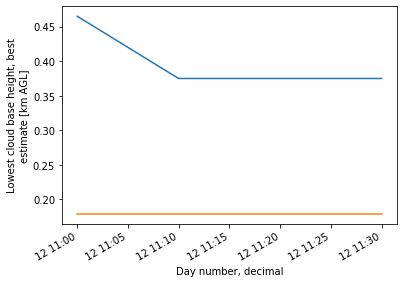

In [10]:
ds_cloud2.ht_e.sel(time=slice('1998-01-12 11:00', '1998-01-12 11:30')).plot();
ds_cloud2.lb_b.sel(time=slice('1998-01-12 11:00', '1998-01-12 11:30')).plot();

# Plot

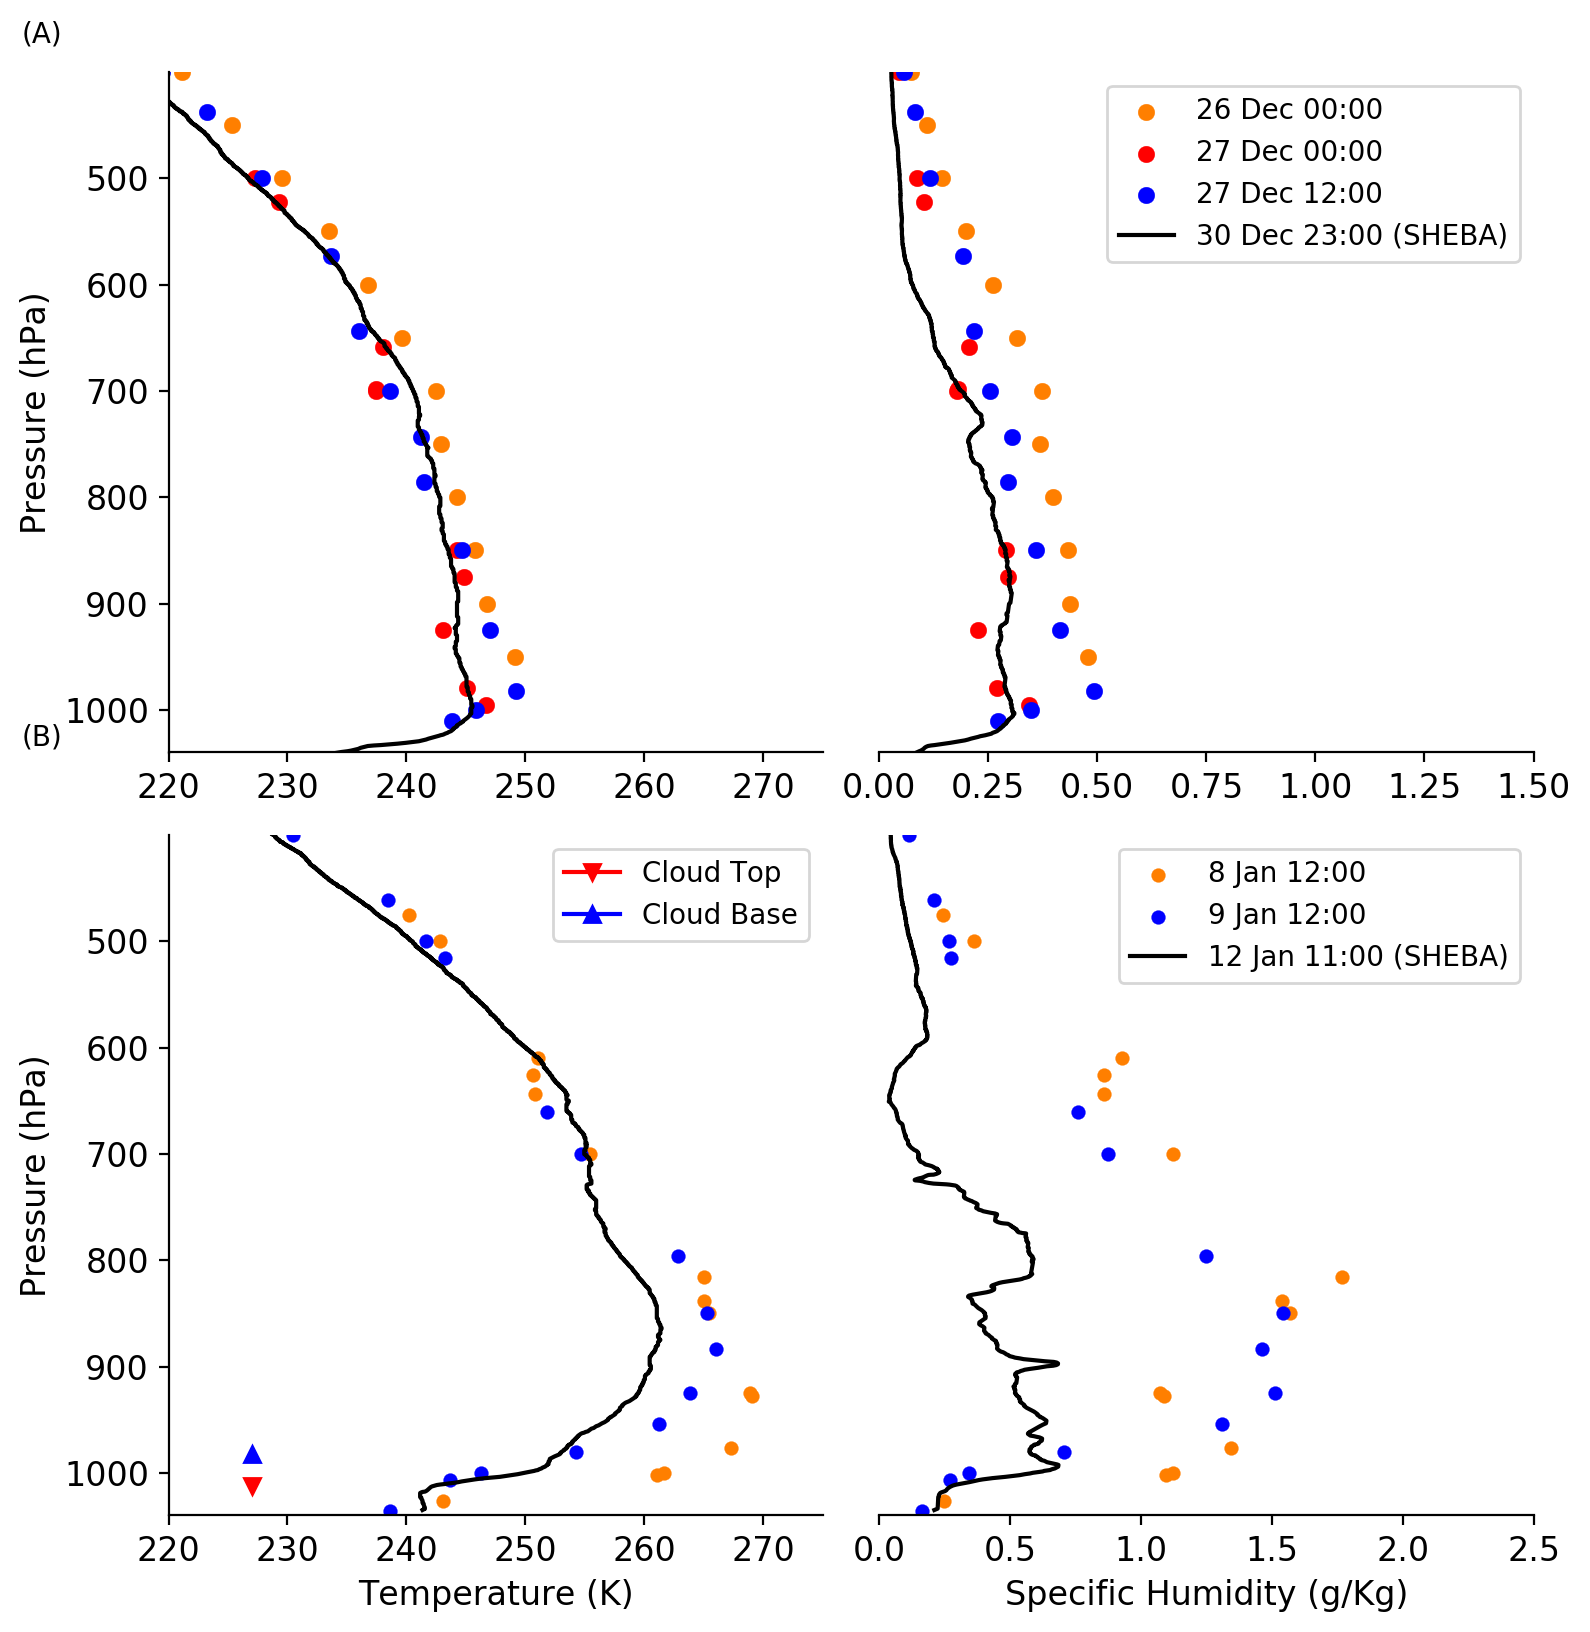

In [22]:
# joint plot
fig, axes = plt.subplots(2,2, figsize=(8,8), dpi=200)
dict_ax = {}
for i, ax in enumerate(axes.flatten()):
    dict_ax[f"ax{i}"] = ax


dict_ax['ax0'].plot(she_30_23.T, she_30_23.p, c ='k')

dict_ax['ax0'].scatter(T_rsm3054_interpolated, x_p, c='#ff7f00', linewidths=0.1) # 26 Dec 00:00
dict_ax['ax0'].scatter(rsm24343_27.T, rsm24343_27.p, c='r', linewidths=0.1)
dict_ax['ax0'].scatter(rsm21824_27_12.T, rsm21824_27_12.p, c='b', linewidths=0.1)


##########################

dict_ax['ax1'].plot(q_she_30_23, she_30_23.p, c ='k', label='30 Dec 23:00 (SHEBA)')

dict_ax['ax1'].scatter(q_rsm3054_interpolated, x_p, c='#ff7f00', linewidths=0.1, label='26 Dec 00:00' ) # 26 Dec 00:00

dict_ax['ax1'].scatter(q_rsm24343_27, rsm24343_27.p, c='r', linewidths=0.1, label='27 Dec 00:00')
dict_ax['ax1'].scatter(q_rsm21824_27_12, rsm21824_27_12.p, c='b', linewidths=0.1, label='27 Dec 12:00')
dict_ax['ax1'].set(xlim=[0, 1.5])


handles, labels = dict_ax['ax1'].get_legend_handles_labels()
order = [1,2,3,0]
dict_ax['ax1'].legend([handles[idx] for idx in order],[labels[idx] for idx in order])




#ordering labels
handles, labels = dict_ax['ax1'].get_legend_handles_labels()
order = [1,2,3,0]
dict_ax['ax1'].legend([handles[idx] for idx in order],[labels[idx] for idx in order])

################################################################33


dict_ax['ax2'].scatter(RSM00025123_8_12.T, RSM00025123_8_12.p, s =25, c='#ff7f00', linewidths=0.1)
dict_ax['ax2'].scatter(RSM00021824_12.T, RSM00021824_12.p, s =25, c='b', linewidths=0.1)
#dict_ax['ax2'].scatter(df_rsm21946_00['temperature'], df_rsm21946_00['pressure'], s=25, c='r')

dict_ax['ax2'].plot(she12.T, she12.p, c='k')
dict_ax['ax2'].tick_params(labelsize=12)
dict_ax['ax2'].set_xlabel('Temperature (K)', fontsize=12)
dict_ax['ax2'].set_ylabel('Pressure (hPa)', fontsize=12)


# Plotting clouds
dict_ax['ax2'].plot([227], highest_12_p, marker='v', label = 'Cloud Top', c='r')
dict_ax['ax2'].plot([227], lowest_12_p, marker='^', label = 'Cloud Base', c='b')

dict_ax['ax2'].legend()


dict_ax['ax3'].scatter(q_RSM00025123_8_12, RSM00025123_8_12.p, s =25, c='#ff7f00', linewidths=0.1, label='8 Jan 12:00')
dict_ax['ax3'].scatter(q_RSM00021824_12, RSM00021824_12.p, s =25, c='b', linewidths=0.1, label='9 Jan 12:00')
#dict_ax['ax3'].scatter(q_rsm21946_00*1000, df_rsm21946_00['pressure'], s=25, linewidths=0.1, c ='r', label='9 Jan 00:00')

dict_ax['ax3'].plot(q_she12, she12.p, 'k', label='12 Jan 11:00 (SHEBA)' )

dict_ax['ax3'].set_xlabel('Specific Humidity (g/Kg)', fontsize=12)

dict_ax['ax3'].tick_params(labelsize=12)
 # setting legend

dict_ax['ax3'].set_ylim([1040,450])
dict_ax['ax3'].set_xlim([0,2.5])


handles, labels = dict_ax['ax3'].get_legend_handles_labels()
order = [1,2,0]
dict_ax['ax3'].legend([handles[idx] for idx in order],[labels[idx] for idx in order])




##################################################################################################################

###########################################################

for ax in list(dict_ax.values())[::2]:
    ax.tick_params(labelsize=12)
    ax.invert_yaxis()
    ax.set(ylim=[1040,400], xlim=[220,275], yticks=np.arange(1000, 400, -100), )
    ax.set_ylabel('Pressure (hPa)', fontsize=12)
    sns.despine(ax=ax)
                   
for ax in list(dict_ax.values())[1::2]:
    ax.tick_params(labelsize=12)
    ax.invert_yaxis()
    ax.set_ylim([1040,400])
    ax.set(yticks=[], yticklabels=[])
    sns.despine(ax=ax, left=True)
                   
dict_ax['ax2'].tick_params(labelsize=12)
#dict_ax['ax1'].set(xlim=[220,270])
dict_ax['ax2'].set_xlabel('Temperature (K)', fontsize=12)
dict_ax['ax3'].set_xlabel('Specific Humidity (g/Kg)', fontsize=12)

#dict_ax['dict_ax['ax2']'].tick_params(labelsize=12)
#dict_ax['ax2'].set_ylim([1040,450]);
#dict_ax['ax3'].set_ylim([1040,450]);
#dict_ax['ax3'].set(xticks=np.arange(0,3, 0.5), xlim=[0,3]);

plt.figtext(x=0.02, y=1, s='(A)');
plt.figtext(x=0.02, y=0.56, s='(B)');
plt.tight_layout();

plt.savefig('/home/ollie/muali/plots_journal_v2/all_clear_profiles_v_30_10_2019_v3.png', 
            dpi=300, bbox_inches='tight')

# All Clear Trajectories

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def traj_plot(*dates, path, path_save=None, plot_name='traj_plot', sea_ice='Yes', stations=None, station_coords=None,
              save_fig=None, figsize=(12,10), pixel=None, title=None ,skiprows=7, boundinglat=None, labels=[],
              colors=[],
              levels = ['400', '780', '1000', '1400', '1850', '2850', '3950', '5220', '6730', '8600']):
    
    """Function to plot trajectories for a variable dates for user specified levels with an option for sea_ice
    brackground on a single plot.
    
    Input arguments: 
    date: as a datetime.datetime object Eg, datetime(1997,12,1,23)
    path: path of data file to be plotted
    path2: path where the file is desired to be saved
    sea_ice: 'Yes' or 'Y' to plot sea_ice
    station_coords: (list), list of coordinates of stations to plot in the from of lat, lon
    save_fig: Default doesn't save
    figsize: controls figure size. To be given as tuple
    pixel: Alter dpi for resolution
    title: Heading of the plot
    skiprows: No of rows to skip while reading the trajectory data. Default 7 but depends on number of Meteo files used while traj 
    calculation
    boundinglat: (int) latitude limit for bounding lat, default 40 N
    labels: trajectory labels
    levels: Trajectory levels to plot as a list of strings
    Eg, levels = ['400', '780', '1000', '1400', '1850', '2850', '3950', '5220', '6730', '8600'] """
    
    # path
    
    date_str = ['{:%m_%d_%H}'.format(date) for date in dates]
    #print(date_str) 
    
    # creating a basemap
    fig = plt.figure(figsize=figsize, dpi=pixel)
        # plt.figure(figsize=(10,8))
        
        # creating projection
    if boundinglat is None:
        m = Basemap(projection='npstere',boundinglat=40,lon_0=270, #lat_0=90, 
            resolution='l')
    else:
        m = Basemap(projection='npstere',boundinglat=boundinglat,lon_0=270, #lat_0=90, 
            resolution='l')
        
    m.fillcontinents(color='0.75')
    ax =plt.gca()    
    
    
    m.drawcoastlines(color='0.75')
    #m.fillcontinents(color='0.75')
    #m.drawparallels(np.arange(-80.,81.,10.), color='grey') # lat andd lons at 20 degrees
    #m.drawmeridians(np.arange(-180.,181.,20.)) # longittudes
    
    if (sea_ice == 'Yes' or sea_ice == 'Y'):    
        # Reading Sea Ice data
        filename_ = '/home/ollie/muali/Data/G10010_SeaIce/G10010_SIBT1850_v1.1.nc'
        ds = Dataset(filename_)
        
        # to get the time index out of the netcdf variable
        # change it according to the month you want to plot
        # Eg, dec here
        # timeindex gives you the index of in the netcdf file
        
        timeindex = date2index(datetime(dates[0].year,dates[0].month,15),ds.variables['time'])
        lats_ice = ds.variables['latitude'][:]
        lons_ice = ds.variables['longitude'][:]
    
        #note that lon goes from 0 to 360
        # should we do a -180 here? No, basemap adjusts it automatically
        # creating our meshgrid according to data coordinates given

        lon_ice, lat_ice = np.meshgrid(lons_ice, lats_ice)
        # meshgrid creates a coordinate system with our axis supplied

        # getting seaice for SHEBA december as an eg but it works for all months
        sea_ice_dec = ds.variables['seaice_conc'][timeindex,:,:] # month dependent on user date
        # masking the low seaice concentration value
        # check low sea ice value by np.sea_ice_dec.mina
        # masking since min sea Ice is -1 for continents
        sea_ice_dec = np.ma.masked_where(sea_ice_dec<=0,sea_ice_dec) 
        ds.close()
        
        ## plotting Sea Ice ##
        m.pcolormesh(lon_ice, lat_ice, sea_ice_dec, latlon=True, cmap='plasma')
        plt.clim(0, 100) # Set the color limits of the current image
#         plt.colorbar(label='Sea Ice Concentration',fraction=0.046, pad=0.04)
        plt.colorbar(label='Sea Ice Concentration', shrink=0.65)
        #divider = make_axes_locatable(ax)
        #cax = divider.append_axes("right", size="5%", pad=0.05)
        #plt.clim(0,100)
        #plt.colorbar(label='Sea Ice Concentration', cax=cax)

    
    
    all_dates = "" # to print dates in the title
    
    #
    ## To do: Pass labels in the function call
    
    
    #### plotting trajectories #####
    
    for i, d_ in enumerate(date_str):
       # print("\n", d_)
        for lvl in levels:
            df = pd.read_csv(path+'tdump_'+lvl+'_'+d_, skiprows=skiprows, header=None, delim_whitespace=True)
        
        #taking lat lons of the trajectories to be plotted
            lat = np.array(df.iloc[:, 9].copy())
            lon = np.array(df.iloc[:, 10].copy())
    
        #Convert lat lon to map coordinates
            x, y = m(lon, lat)
    
        #Plot the points on the map
            plt.plot(x, y,linewidth=1.0, color=colors[i] )
            
            # labeling single traj to avoid cluttering
            if lvl is levels[-1]:
                plt.plot(x, y,linewidth=1.0, color=colors[i], label= labels[i])      
        #source point
            xpt, ypt = m(lon[-1], lat[-1])
           # plt.plot(xpt, ypt, marker = '*', markerfacecolor=colors[i], linewidth=0, markersize=5)
            # Text
            plt.text(xpt,ypt,lvl, fontsize=8, color=colors[i])
            # plt.text(xpt,ypt,'Source (%5.1fW,%3.1fN)' % (lonpt,latpt), color='yellow', fontsize=15)
        
   
  
    if station_coords is not None:
        np_station_coords = np.array(station_coords)
        st_x, st_y = m(np_station_coords[:,1], np_station_coords[:,0]) # lon, lat
        plt.scatter(st_x, st_y, marker = '*', c='#ff7f00', s=120, edgecolors='k', linewidths=0.7, zorder=10,
                   label='Stations')  #ff7f00
    
    #SHEBA point
#     x_s, y_s = m([-149.310, -155.89, -159.809],[74.875, 74.98, 75.084])
#     plt.plot(x_s, y_s, linestyle='dotted', c='blue', label='SHEBA', zorder=100)
#     plt.plot(x_s, y_s, marker = '*', c='#ffed00', edgecolors='k', linewidths=0.7, s=140, 
#                 label='Observations', zorder=100)
    plt.legend(loc='upper right')


    for date in dates:
        all_dates +='{}'.format(date)+" "
        
    if title is not None:
        plt.title(all_dates)
    if save_fig != None:
        # saving fig
        plt.savefig(path_save + plot_name + '.png', dpi=300, bbox_inches='tight' )
        plt.close(fig)
    else:
        plt.show(fig)

/home/ollie/muali/miniconda3/envs/work_env_basemap/lib/python3.6/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


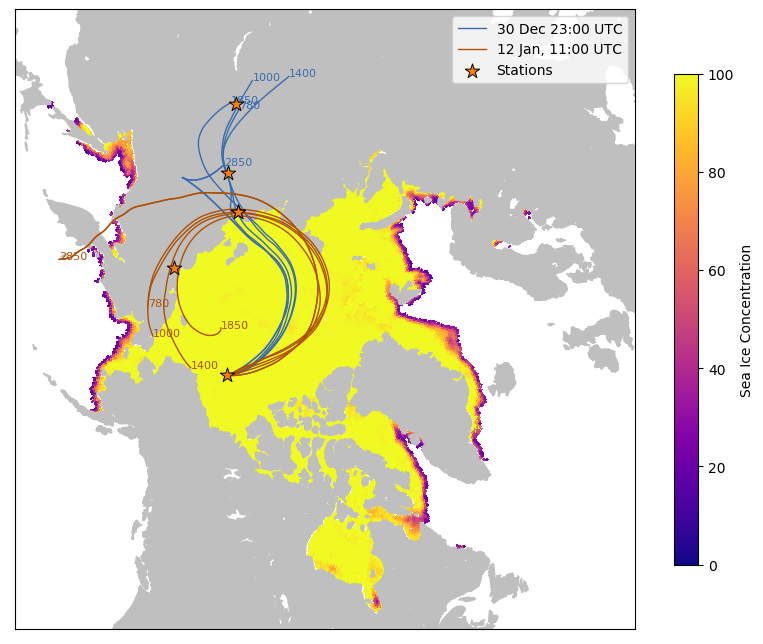

In [15]:
labels = ['30 Dec 23:00 UTC', '12 Jan, 11:00 UTC']
colors = ['#386cb0',  '#af5002'] 
path_save= '/home/ollie/muali/plots_journal_v2/'
plot_name='all_clear_traj_v_30_10_2019_v4'

# stations to plot
station_coords_list = [rsm_21824_coords, rsm21821_coords, rsm24343_coords, rsm3054_coords, Sheba_coords, RSM00025123_coords]
traj_plot(datetime(1997,12,30,23), datetime(1998,1,12, 11),\
          path=path_traj, figsize=(10,10), pixel=100, station_coords=station_coords_list, labels=labels, 
          colors=colors, boundinglat=50,
          levels=['780', '1000', '1400', '1850', '2850'])

In [16]:
labels = ['30 Dec 23:00 UTC', '12 Jan, 11:00 UTC']
colors = ['#386cb0',  '#af5002'] 
path_save= '/home/ollie/muali/plots_journal_v2/'
plot_name='all_clear_traj_v_30_10_2019_v4'

# stations to plot
station_coords_list = [rsm_21824_coords, rsm21821_coords, rsm24343_coords, rsm3054_coords, Sheba_coords, RSM00025123_coords]
traj_plot(datetime(1997,12,30,23), datetime(1998,1,12, 11),\
          path=path_traj, figsize=(10,10), pixel=100, station_coords=station_coords_list, labels=labels, 
          colors=colors, boundinglat=50, save_fig=1 ,path_save=path_save, plot_name=plot_name, 
          levels=['780', '1000', '1400', '1850', '2850'])

/home/ollie/muali/miniconda3/envs/work_env_basemap/lib/python3.6/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
